# Explore here

In [1]:
# System imports
import os
import shutil

# Image manipulation
from PIL import Image
from matplotlib.image import imread
from skimage import io
from skimage.transform import resize

# Data manipulation
import numpy as np
from sklearn.model_selection import train_test_split

# Data visualization libraries
import matplotlib.pyplot as plt

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [2]:
# function to separate the images by its name
def organize_images(folder_path):
    cat_folder = os.path.join(folder_path, 'cat')
    dog_folder = os.path.join(folder_path, 'dog')

    # Checks if the cat and dog folders exist, if not, creates them
    for folder in [cat_folder, dog_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)

    # Move only images to the corresponding folders
    images = [file for file in os.listdir(folder_path) if file.lower().endswith(('.jpg'))]
    for image in images:
        if 'cat' in image:
            shutil.move(os.path.join(folder_path, image), os.path.join(cat_folder, image))
        elif 'dog' in image:
            shutil.move(os.path.join(folder_path, image), os.path.join(dog_folder, image))



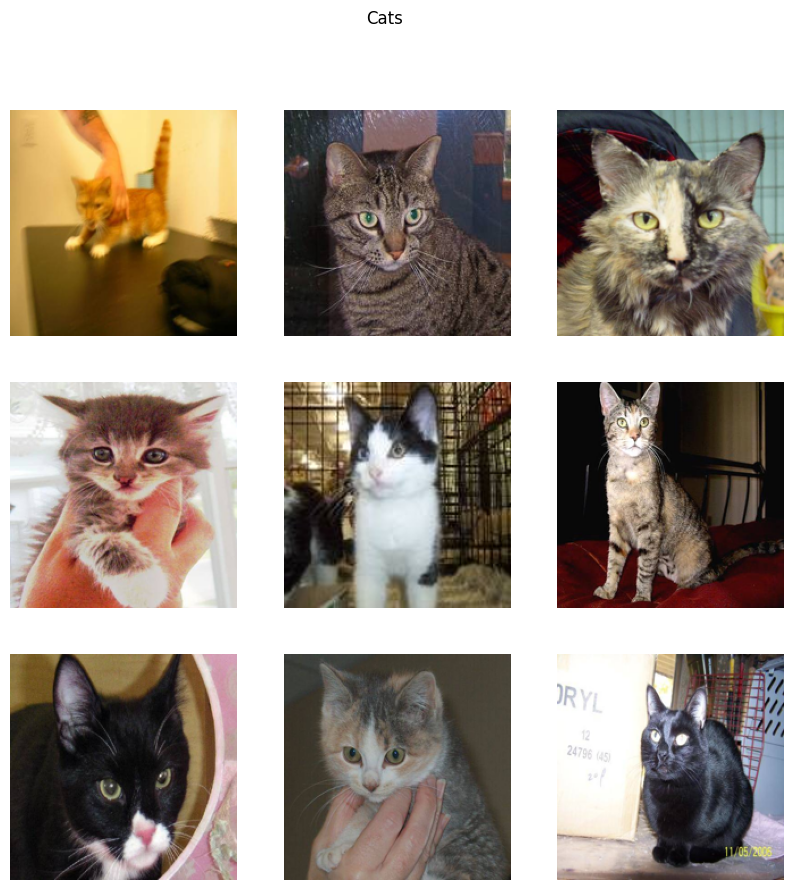

In [5]:
# Path to the folder that contain the images
folder_path = r"C:\Users\Elisa\Documents\Elisa\Personales\4Geeks Academy\repos\homework\image-classifier - copia\data\raw\dogs-vs-cats\train"

# Get the path of files in the folder.
files = os.listdir(folder_path)

# Select the files with jpg extensions.
images = [file for file in files if file.lower().endswith(('.jpg'))]

# Separate cat and dog images based on the name
cat_images = [img for img in images if 'cat' in img]
dog_images = [img for img in images if 'dog' in img]

# Plot the first 9 cat images.
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(9):
    image_path = os.path.join(folder_path, cat_images[i])
    img = Image.open(image_path)

    # Make all the images the same sizes so the plot look bet
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0
 
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].axis('off')

# Title for cats.
plt.suptitle('Cats')
plt.show()


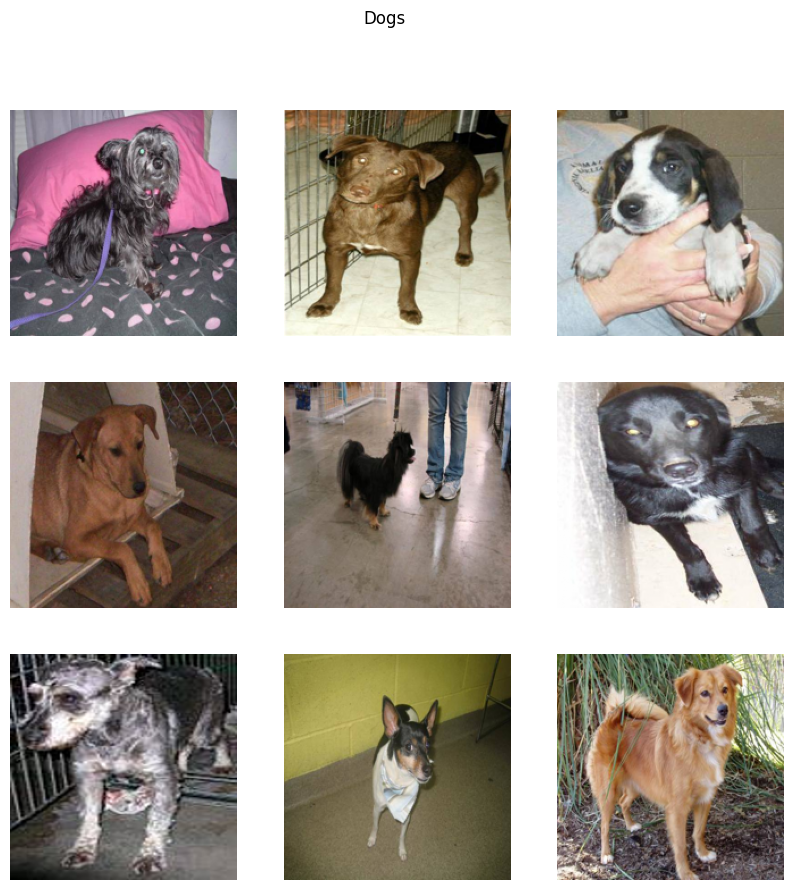

In [6]:
# Plot the first 9 dog images.
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(9):
    
    image_path = os.path.join(folder_path, dog_images[i])
    img = Image.open(image_path)

    # Make all the images the same sizes so the plot look better
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0
 
    axs[i // 3, i % 3].imshow(img_array)
    axs[i // 3, i % 3].axis('off')

# Title for dogs.
plt.suptitle('Dogs')
plt.show()


In [11]:
# organize the images by name
organize_images(folder_path)

In [4]:

train_dir = r'C:\Users\Elisa\Documents\Elisa\Personales\4Geeks Academy\repos\homework\image-classifier - copia\data\raw\dogs-vs-cats\train'
test_dir = r'data\raw\dogs-vs-cats\train\test1'
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['dog', 'cat']
)

test_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['test1']
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [21]:
#make the network
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [4]:
# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

model.fit(train_data, epochs = 1)




782/782 [==============================] - 15526s 20s/step - loss: 4.5720 - accuracy: 0.5003


In [6]:
checkpoint = ModelCheckpoint("..models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])


Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5053 
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ..models\vgg16_1.h5


c:\Users\Elisa\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 2067s 21s/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 1.3864 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4850 
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 2021s 20s/step - loss: 0.6933 - accuracy: 0.4850 - val_loss: 1.3863 - val_accuracy: 0.0000e+00
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4884 
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 2013s 20s/step - loss: 0.6932 - accuracy: 0.4884 - val_loss: 1.3863 - val_accuracy: 1.0000


In [22]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

NameError: name 'hist' is not defined



1/1 [==============================] - 1s 676ms/step
cat


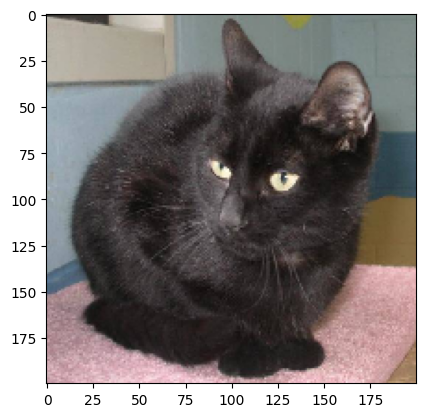

In [5]:

img = image.load_img(r"C:\Users\Elisa\Documents\Elisa\Personales\4Geeks Academy\repos\homework\image-classifier - copia\data\raw\dogs-vs-cats\train\test1\28.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")